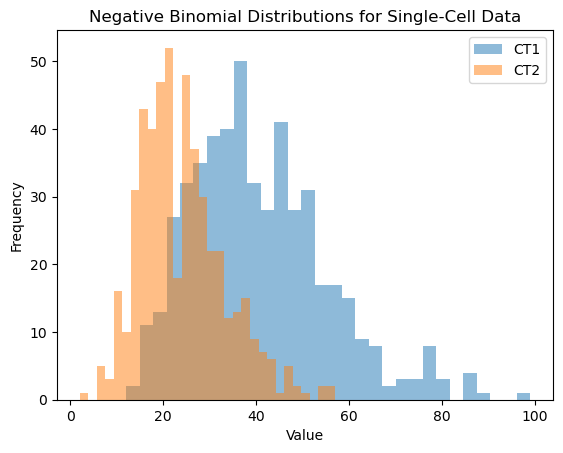

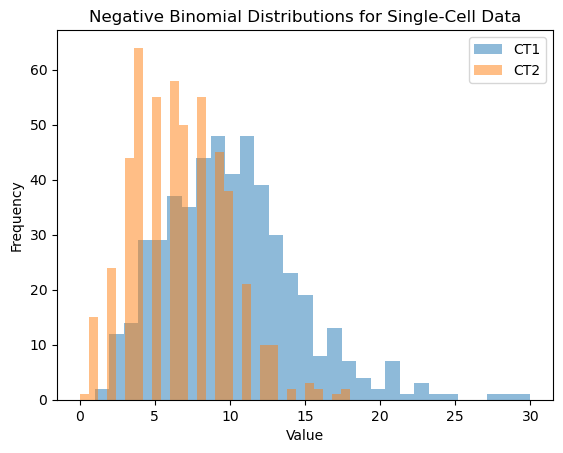

ct1_data matrix (2xN):
 (2, 500)
ct2_data matrix (2xN):
 (2, 500)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gene_distribution(prob1, prob2, size=10, num_cells=500, seed=42, save_data=False, print_data=False, plotit=False):
    # Set a random seed for reproducibility
    np.random.seed(seed)
    
    # Generate negative binomial data for two cell types
    ct1_data = np.random.negative_binomial(size, prob1, num_cells)
    ct2_data = np.random.negative_binomial(size, prob2, num_cells)
    
    # Optionally print the data
    if print_data:
        print("CT1 Data:", ct1_data)
        print("CT2 Data:", ct2_data)
    
    # Save the data if requested
    if save_data:
        np.savetxt('ct1_data.csv', ct1_data, delimiter=',')
        np.savetxt('ct2_data.csv', ct2_data, delimiter=',')
        print("Data saved as 'ct1_data.csv' and 'ct2_data.csv'")
    
    if plotit:
        # Create histograms for both distributions
        plt.hist(ct1_data, bins=30, alpha=0.5, label='CT1')
        plt.hist(ct2_data, bins=30, alpha=0.5, label='CT2')
    
        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title('Negative Binomial Distributions for Single-Cell Data')
    
        # Add legend
        plt.legend(loc='upper right')
    
        # Show the plot
        plt.show()

    # Return the data for further use if needed
    return ct1_data, ct2_data

# Example of using the function
ct1_data_g1, ct2_data_g1 = simulate_gene_distribution(0.2, 0.3, save_data=False, print_data=False, plotit=True)
ct1_data_g2, ct2_data_g2 = simulate_gene_distribution(0.5, 0.6, save_data=False, print_data=False, plotit=True)

# Create 2xN matrix where N is the number of cells
ct1_data = np.vstack([ct1_data_g1, ct1_data_g2])  # Stack along the rows (2xN for ct1)
ct2_data = np.vstack([ct2_data_g1, ct2_data_g2])  # Stack along the rows (2xN for ct2)

# Display the resulting matrices
print("ct1_data matrix (2xN):\n", ct1_data.shape)
print("ct2_data matrix (2xN):\n", ct2_data.shape)


In [2]:
import numpy as np

def min_max_scale(data):
    """
    Min-max scale the input data to the range [-π/2, π/2] by row (gene).

    Args:
        data (numpy array): The data to be scaled (rows are genes, columns are cells).

    Returns:
        numpy array: The scaled data in the range [-π/2, π/2], scaled row-wise.
    """
    # Initialize a new array to store the scaled data
    scaled_data = np.empty_like(data, dtype=float)

    # Apply min-max scaling to each row (gene) individually
    for i in range(data.shape[0]):  # Iterate over rows (genes)
        min_value = np.min(data[i])
        max_value = np.max(data[i])
        
        # Perform min-max scaling to the range [-π/2, π/2]
        scaled_data[i] = ((data[i] - min_value) / (max_value - min_value)) * (np.pi / 2 - (-np.pi / 2)) - (np.pi / 2)
    
    return scaled_data

# Apply scaling to each gene (row) for both cell types
ct1_data_scaled = min_max_scale(ct1_data)  # Scale each gene (row) for ct1_data
ct2_data_scaled = min_max_scale(ct2_data)  # Scale each gene (row) for ct2_data

# Display the resulting scaled data
print("Scaled ct1_data:\n", ct1_data_scaled)
print("Scaled ct2_data:\n", ct2_data_scaled)
print("Scaled shape ct1_data:\n", ct1_data_scaled.shape)
print("Scaled shape ct2_data:\n", ct2_data_scaled.shape)

Scaled ct1_data:
 [[-0.30693721 -0.5958193  -1.02914242 -0.41526799 -1.10136294 -0.70415008
  -1.06525268 -0.70415008 -0.84859112  0.16249617 -0.16249617 -1.57079633
  -0.81248086 -0.88470138 -0.70415008 -0.63192956 -0.88470138 -0.88470138
  -0.23471669  0.30693721 -0.66803982  0.05416539 -0.52359878 -0.5958193
  -0.41526799 -0.5958193  -0.52359878 -1.20969372 -0.88470138 -0.41526799
  -1.3180245  -0.27082695 -0.81248086 -1.20969372  0.16249617 -1.24580398
  -0.7763706  -0.70415008 -0.66803982 -0.52359878 -1.1374732  -0.37915773
  -0.88470138 -0.37915773 -0.74026034 -0.81248086 -0.84859112 -0.09027565
  -0.7763706  -0.74026034 -0.5958193   1.1374732  -0.30693721 -0.41526799
  -0.7763706  -0.12638591 -0.41526799 -1.1374732   0.01805513 -0.12638591
  -0.27082695 -0.23471669  0.7763706  -1.10136294 -0.7763706  -1.02914242
  -1.46246555 -0.27082695 -1.20969372 -0.66803982  0.34304747 -0.70415008
  -0.7763706  -0.52359878 -0.41526799 -1.17358346 -0.92081164  0.09027565
   0.27082695 -1.2819

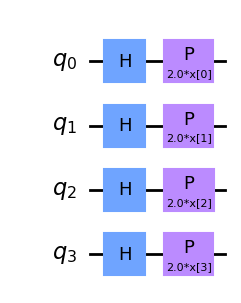

In [ ]:
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.optimizers import COBYLA, L_BFGS_B, GradientDescent, CG
import time
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.optimizers import ADAM

ng_ct1 = 2
ng_ct2 = 2
num_features = ng_ct1 + ng_ct2
#>>> data_map = lambda x: x[0]*x[0] + 1  # note: input is an array
#>>> prep = ZFeatureMap(3, reps=1, data_map_func=data_map)
#>>> print(prep.decompose())
#     ┌───┐┌──────────────────────┐
#q_0: ┤ H ├┤ P(2.0*x[0]**2 + 2.0) ├
#     ├───┤├──────────────────────┤
#q_1: ┤ H ├┤ P(2.0*x[1]**2 + 2.0) ├
#     ├───┤├──────────────────────┤
#q_2: ┤ H ├┤ P(2.0*x[2]**2 + 2.0) ├
#     └───┘└──────────────────────┘
#feature_map = ZZFeatureMap(feature_dimension=num_features, entanglement='full', reps=1)
feature_map_ct1 = ZFeatureMap(feature_dimension=ng_ct1, reps=1)
feature_map_ct2 = ZFeatureMap(feature_dimension=ng_ct2, reps=1)


feature_map.decompose().draw(output="mpl", style="clifford", fold=20)


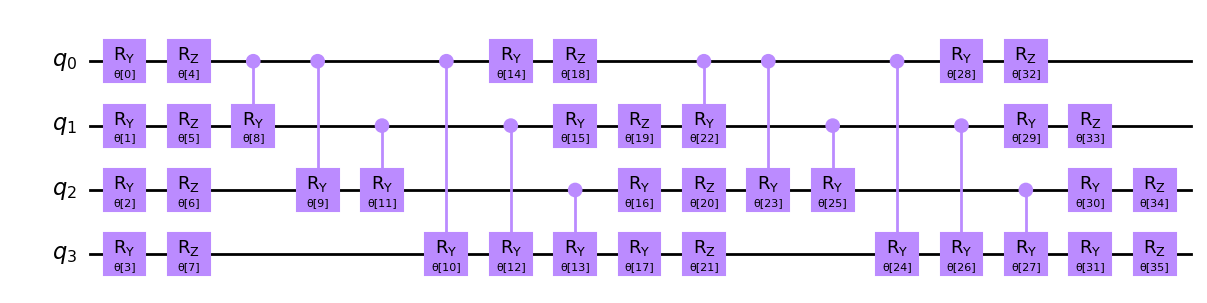

In [136]:
ansatz_grn = TwoLocal(num_qubits=num_features, rotation_blocks = ['ry','rz'], entanglement_blocks ='cry', entanglement='full', reps=2)
ansatz_grn.decompose().draw(output="mpl", style="clifford", fold=20)

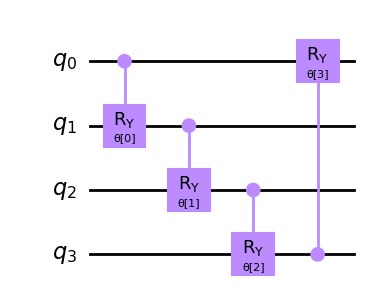

In [112]:
lr = [[0, 1], [1, 2], [2, 3], [3, 0]]  # circular entanglement for 4 qubits
ansatz_lr = TwoLocal(num_qubits=num_features, entanglement_blocks='cry', entanglement=lr, reps=1)
ansatz_lr.decompose().draw(output="mpl", style="clifford", fold=20)

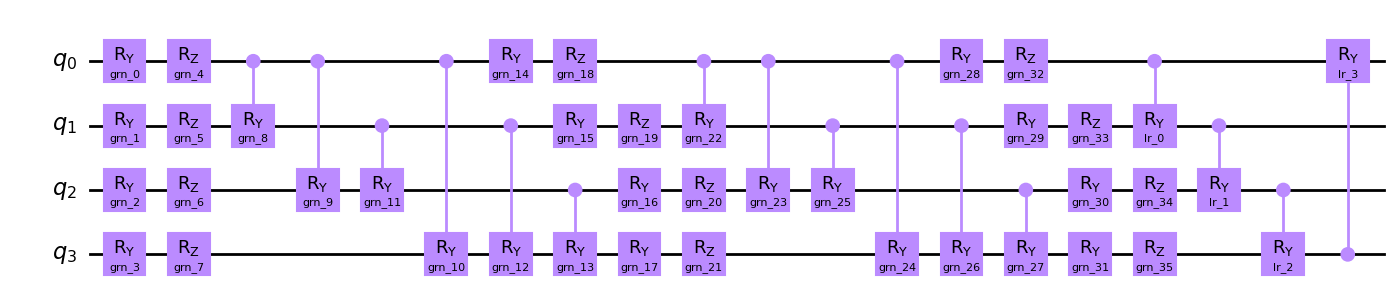

In [113]:
from qiskit.circuit import Parameter

# Define symbolic parameters (if you haven't already)
theta_grn = [Parameter(f"grn_{i}") for i in range(ansatz_grn.num_parameters)]
theta_lr = [Parameter(f"lr_{i}") for i in range(ansatz_lr.num_parameters)]

# Bind the parameters to the ansatzes.  Use dictionaries for clarity.
param_dict_grn = dict(zip(ansatz_grn.parameters, theta_grn))
param_dict_lr = dict(zip(ansatz_lr.parameters, theta_lr))

ansatz_grn.assign_parameters(param_dict_grn, inplace=True)
ansatz_lr.assign_parameters(param_dict_lr, inplace=True)


# Now compose – no more name conflicts!
ansatz = ansatz_grn.compose(ansatz_lr)

ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

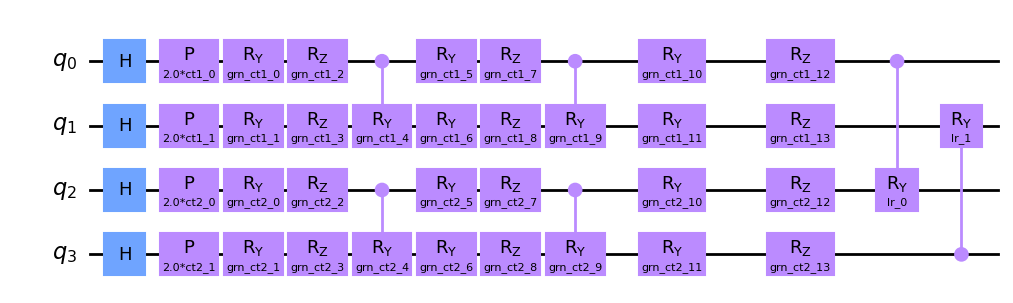

In [137]:
from qiskit.circuit.library import ZFeatureMap, TwoLocal
from qiskit.circuit import QuantumCircuit, Parameter

ng_ct1 = 2
ng_ct2 = 2
num_features = ng_ct1 + ng_ct2

# Separate feature maps
feature_map_ct1 = ZFeatureMap(feature_dimension=ng_ct1, reps=1, name="feature_ct1")
feature_map_ct2 = ZFeatureMap(feature_dimension=ng_ct2, reps=1, name="feature_ct2")

# TwoLocal ansatzes (within cell types)
ansatz_grn_ct1 = TwoLocal(num_qubits=ng_ct1, rotation_blocks=['ry', 'rz'], entanglement_blocks='cry', entanglement='full', reps=2, name="ansatz_grn_ct1")
ansatz_grn_ct2 = TwoLocal(num_qubits=ng_ct2, rotation_blocks=['ry', 'rz'], entanglement_blocks='cry', entanglement='full', reps=2, name="ansatz_grn_ct2")

# Ligand-receptor interaction ansatz (across cell types)
lr_entanglement = [[0, 2], [3, 1]]  # Example: Entangle corresponding genes
ansatz_lr = TwoLocal(num_qubits=num_features, entanglement_blocks='cry', entanglement=lr_entanglement, reps=1, name="ansatz_lr")  # One ansatz for all


# Parameter binding for the ansatzes (Do this FIRST)
theta_ct1 = [Parameter(f"ct1_{i}") for i in range(feature_map_ct1.num_parameters)]
theta_ct2 = [Parameter(f"ct2_{i}") for i in range(feature_map_ct2.num_parameters)]
theta_grn_ct1 = [Parameter(f"grn_ct1_{i}") for i in range(ansatz_grn_ct1.num_parameters)]
theta_grn_ct2 = [Parameter(f"grn_ct2_{i}") for i in range(ansatz_grn_ct2.num_parameters)]
theta_lr = [Parameter(f"lr_{i}") for i in range(ansatz_lr.num_parameters)]

param_dict_ct1 = dict(zip(feature_map_ct1.parameters, theta_ct1))
param_dict_ct2 = dict(zip(feature_map_ct2.parameters, theta_ct2))
param_dict_grn_ct1 = dict(zip(ansatz_grn_ct1.parameters, theta_grn_ct1))
param_dict_grn_ct2 = dict(zip(ansatz_grn_ct2.parameters, theta_grn_ct2))
param_dict_lr = dict(zip(ansatz_lr.parameters, theta_lr))

feature_map_ct1.assign_parameters(param_dict_ct1, inplace=True)
feature_map_ct2.assign_parameters(param_dict_ct2, inplace=True)
ansatz_grn_ct1.assign_parameters(param_dict_grn_ct1, inplace=True)
ansatz_grn_ct2.assign_parameters(param_dict_grn_ct2, inplace=True)
ansatz_lr.assign_parameters(param_dict_lr, inplace=True)

# Decompose feature maps and ansatzes before appending them
feature_map_ct1_decomposed = feature_map_ct1.decompose()
feature_map_ct2_decomposed = feature_map_ct2.decompose()
ansatz_grn_ct1_decomposed = ansatz_grn_ct1.decompose()
ansatz_grn_ct2_decomposed = ansatz_grn_ct2.decompose()
ansatz_lr_decomposed = ansatz_lr.decompose()

# Combine everything into the final circuit
ccgrn_circuit = QuantumCircuit(num_features, name="ccgrn_network")
# Add decomposed feature maps
ccgrn_circuit.append(feature_map_ct1_decomposed, [0, 1])
ccgrn_circuit.append(feature_map_ct2_decomposed, [2, 3])
# Add the decomposed cell-specific ansatzes
ccgrn_circuit.append(ansatz_grn_ct1_decomposed, [0, 1])
ccgrn_circuit.append(ansatz_grn_ct2_decomposed, [2, 3])
# Add decomposed LR interaction ansatz
ccgrn_circuit.append(ansatz_lr_decomposed, range(num_features))

# Now you should see the individual gates when you draw the circuit
ccgrn_circuit.decompose().draw(output="mpl", style="clifford", fold=40)


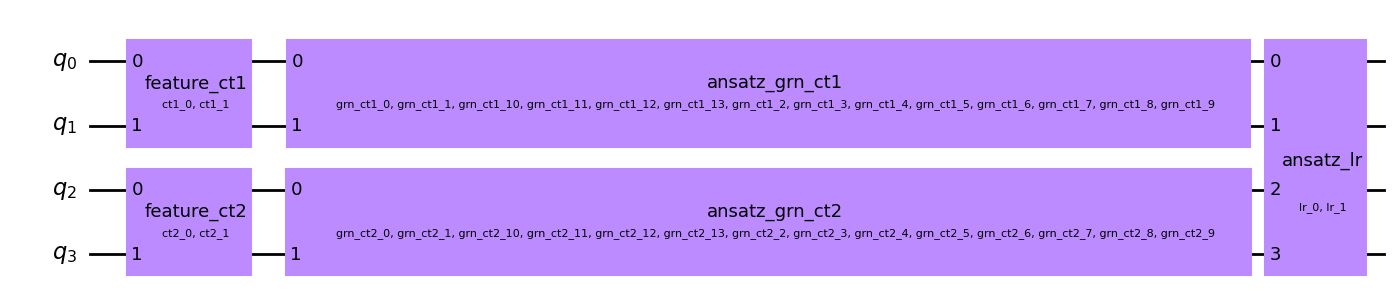

In [134]:

# Now you should see the individual gates when you draw the circuit
ccgrn_circuit.draw(output="mpl", style="clifford", fold=40)


In [152]:

# Define cost function ONCE (outside the optimization loop)
def cost_func_vqe(params, combined_ansatz, hamiltonian, estimator):
    """Cost function for VQE (using StatevectorEstimator)"""
    bound_ansatz = combined_ansatz.assign_parameters(params)
    statevector = Statevector(bound_ansatz)  # Get the statevector
    statevector_array = statevector.data  # Convert Statevector to NumPy array

    # Correct way to calculate expectation value:
    hamiltonian_matrix = hamiltonian.to_matrix()
    energy = np.real(statevector_array.conjugate() @ hamiltonian_matrix @ statevector_array)  # Use @ operator
    
    #cost = estimator.run([pub]).result()[0].data.evs
    # or
    # energy = np.real(np.dot(statevector_array.conjugate(), np.dot(hamiltonian_matrix, statevector_array))) #Use numpy.dot

    return energy

In [156]:
from qiskit.circuit.library import ZFeatureMap, TwoLocal
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.primitives import StatevectorEstimator
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import numpy as np
from scipy.optimize import minimize


# Initialize estimator ONCE (outside the optimization loop)
estimator = StatevectorEstimator()
#estimator = Estimator()

# --- Interaction Strength ---
interaction_strength = SparsePauliOp.from_list([("ZZII", -1.0), ("IIZZ", -1.0)])  # Example

x0_interaction = np.random.rand(ccgrn_circuit.num_parameters)

result_interaction_cobyla = minimize(
    cost_func_vqe, 
    x0_interaction, 
    args=(ccgrn_circuit, interaction_strength, estimator), 
    method="BFGS"
)
print("BFGS (Interaction Strength):", result_interaction_cobyla)

BFGS (Interaction Strength):   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.9999999999984717
        x: [ 1.692e+00  9.033e-01 ...  3.633e-06  8.512e-08]
      nit: 26
      jac: [ 7.451e-08 -1.311e-06 ...  1.490e-08 -5.662e-07]
 hess_inv: [[ 1.143e+01 -3.224e+00 ... -5.051e+01 -1.450e-01]
            [-3.224e+00  1.492e+00 ...  1.488e+01 -7.034e-01]
            ...
            [-5.051e+01  1.488e+01 ...  2.322e+02  3.771e-01]
            [-1.450e-01 -7.034e-01 ...  3.771e-01  3.751e+00]]
     nfev: 1085
     njev: 31


In [155]:
# --- Identity Observable ---
identity_observable = SparsePauliOp.from_list([("IIII", -1.0)])

x0_identity = np.random.rand(ccgrn_circuit.num_parameters)

result_identity_bfgs = minimize(
    cost_func_vqe, 
    x0_identity, 
    args=(ccgrn_circuit, identity_observable, estimator), 
    method="BFGS"
)

print("BFGS (Identity):", result_identity_bfgs)

result_identity_cobyla = minimize(
    cost_func_vqe, 
    x0_identity, 
    args=(ccgrn_circuit, identity_observable, estimator), 
    method="COBYLA"
)

print("COBYLA (Identity):", result_identity_cobyla)

BFGS (Identity):   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.9999999999999987
        x: [ 4.972e-01  1.348e-01 ...  6.761e-01  7.021e-01]
      nit: 0
      jac: [ 3.725e-08  1.490e-08 ...  1.490e-08  0.000e+00]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 35
     njev: 1
COBYLA (Identity):  message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.9999999999999996
       x: [ 5.932e-01  8.083e-01 ...  6.123e-01  1.650e+00]
    nfev: 268
   maxcv: 0.0
